In [2]:
from numpy import *

def loadDataSet(filename):
    numFeat = len(open(filename).readline().split('\t')) - 1
    dataMat = [];labelMat=[]
    fr = open(filename)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

def standRegres(xArr,yArr):
    xMat = mat(xArr);yMat = mat(yArr).T
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print("this matrix is singular,cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws
        

In [3]:
xArr,yArr = loadDataSet('ex0.txt')

In [4]:
shape(xArr)

(200, 2)

In [5]:
shape(yArr)

(200,)

In [6]:
ws = standRegres(xArr,yArr)
ws

matrix([[ 3.00774324],
        [ 1.69532264]])

In [7]:
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat*ws

In [8]:
xMat

matrix([[ 1.      ,  0.067732],
        [ 1.      ,  0.42781 ],
        [ 1.      ,  0.995731],
        [ 1.      ,  0.738336],
        [ 1.      ,  0.981083],
        [ 1.      ,  0.526171],
        [ 1.      ,  0.378887],
        [ 1.      ,  0.033859],
        [ 1.      ,  0.132791],
        [ 1.      ,  0.138306],
        [ 1.      ,  0.247809],
        [ 1.      ,  0.64827 ],
        [ 1.      ,  0.731209],
        [ 1.      ,  0.236833],
        [ 1.      ,  0.969788],
        [ 1.      ,  0.607492],
        [ 1.      ,  0.358622],
        [ 1.      ,  0.147846],
        [ 1.      ,  0.63782 ],
        [ 1.      ,  0.230372],
        [ 1.      ,  0.070237],
        [ 1.      ,  0.067154],
        [ 1.      ,  0.925577],
        [ 1.      ,  0.717733],
        [ 1.      ,  0.015371],
        [ 1.      ,  0.33507 ],
        [ 1.      ,  0.040486],
        [ 1.      ,  0.212575],
        [ 1.      ,  0.617218],
        [ 1.      ,  0.541196],
        [ 1.      ,  0.045353],
        

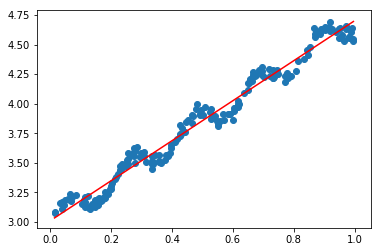

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1],yMat.T[:,0])
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*ws
ax.plot(xCopy[:,1],yHat,c='r')
plt.show()

In [10]:
corrcoef(yHat.T,yMat)

array([[ 1.        ,  0.13653777],
       [ 0.13653777,  1.        ]])

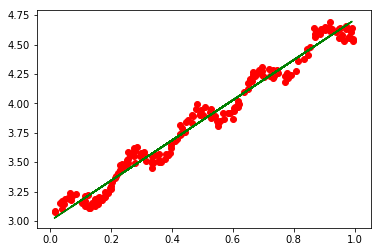

In [11]:
#使用SKlearn进行回归预测
import numpy as np
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_train = xMat[:-50,1]
y_train = yMat.T[:-50]
x_test = xMat[-50:,1]
y_test = yMat.T[-50:]
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
plt.scatter(xMat[:,1],yMat.T[:,0],c='r')
plt.plot(x_test,y_pred,c='g')
plt.show()

In [12]:
regr.coef_

array([[ 1.7108288]])

In [25]:
corrcoef(y_pred,y_test.T)

ValueError: all the input array dimensions except for the concatenation axis must match exactly